# 利用红酒数据集学习随机森林中的n_estimators参数并对比随机森林和决策数分类模型
### 1. 导入所需要的包
### 2. 导入所需要的数据集
### 3. sklean建模的基本流程
### 4. 画出随机森林和决策树在一组交叉验证的结果
### 5. 画出随机森林和决策树在十组交叉验证的效果对比（一般不做，这里是为了对比两个模型）
### 6. n_estimators的学习曲线

In [1]:
 # 1. 导入所需要的包
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
# 2. 导入数据集
wine = load_wine()

In [3]:
# 3. 分割测试集和训练集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.25)

In [4]:
# 4. 创建模型并训练
clf = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=25)
clf = clf.fit(x_train,y_train)
rfc = rfc.fit(x_train,y_train)

In [5]:
# 查看结果
clf_s = clf.score(x_test,y_test)
rfc_s = clf.score(x_test,y_test)
print("DecisionTree:{}".format(clf_s), "RandomForest:{}".format(rfc_s))

DecisionTree:0.9333333333333333 RandomForest:0.9333333333333333


<class 'numpy.ndarray'>
RandomForest
0.9777777777777779
<class 'numpy.ndarray'>
DecisionTree
0.8647058823529411


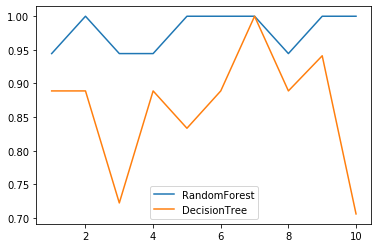

In [6]:
# 一组交叉验证的结果
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25), DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print(type(score))
    print("{}".format(label))
    print("{}".format(score.mean()))
    plt.plot(range(1,11),score,label =label)
    plt.legend()
    label = "DecisionTree"
plt.show()


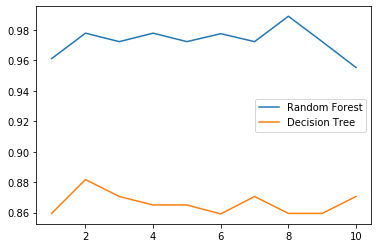

In [7]:
# 十组交叉验证结果
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

In [ ]:
# 6. n_estimators的学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa), superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [ ]:
import random

In [ ]:
rng = np.random.RandomState(1)